In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
embeddings_2d = np.load("video-ins-text-20k-embedding.npy")  # video-ins-text-20k-embedding.npy video-ins-10k-embedding.npy
all_label_list = [] #['ShareGemini'] * 5000 + ['Video-ChatGPT'] * 5000#[]#['ShareGemini'] * 5000 + ['Video-ChatGPT'] * 5000
for lbl in ['LongAlpaca', 'LongQLoRA', 'ShareGemini', 'Video-ChatGPT']:
    all_label_list += [lbl] * 5000

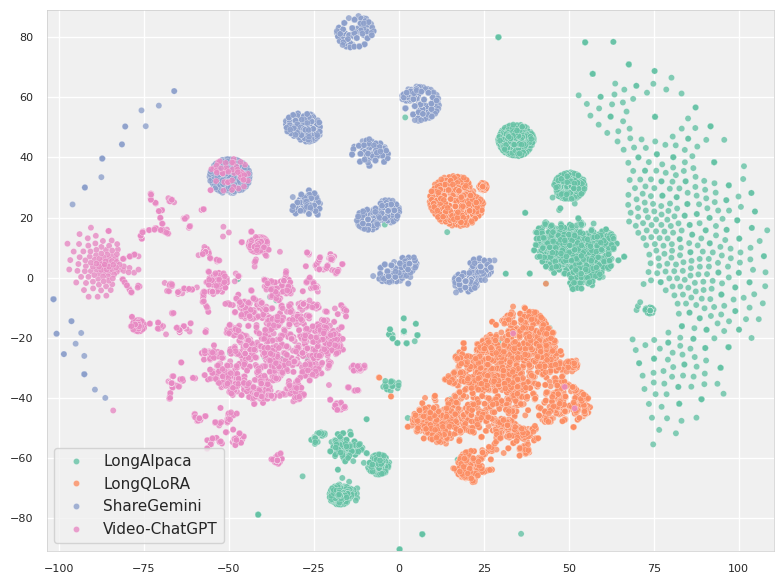

In [7]:
df = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
df['label'] = np.asarray(all_label_list)

plt.figure(figsize=(8, 6))  # (6.5, 5) for 2 datasets, (8, 6) for 4 datasets.

sns.set(style="whitegrid", rc={'axes.facecolor':'#f0f0f0', 'grid.color': 'white'})  # 设置背景颜色和网格线颜色

scatter_plot = sns.scatterplot(
    x='x', y='y',
    hue='label',
    palette={
        'LongAlpaca': '#66c2a5',
        'LongQLoRA': '#fc8d62',
        'ShareGemini': '#8da0cb',
        'Video-ChatGPT': '#e78ac3'
    },
    data=df,
    alpha=0.8,
    edgecolor='white', # 'whitesmoke' , 'gray', 'white', 'floralwhite'
    linewidth=0.2,
    s=20  # size of dots
)

# set width of boarderlines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# set tick lines
ax.tick_params(axis='both', which='major', width=0.5, color='lightgray', labelsize=8 )
ax.tick_params(axis='both', which='minor', width=0.5, color='lightgray', labelsize=8 )

scatter_plot.set(xlabel=None, ylabel=None)

# adjust position of the legend
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize='medium', title='Label')
plt.legend(loc='lower left')

plt.xlim(df['x'].min() - 2, df['x'].max() + 2)
plt.ylim(df['y'].min() - 0.5, df['y'].max() + 2)

plt.tight_layout()

# 保存图像
plt.savefig('./vis_instruction_mix-sample-new.pdf', bbox_inches='tight')
plt.show()